In [179]:
import numpy as np
import pandas as pd
import scipy.stats as sy
import matplotlib.pyplot as plt
from sklearn import cluster as sc
pd.set_option('display.max_column', None)


In [180]:
data = pd.read_csv("../Data/final_data.csv", delimiter=',')


In [181]:
data

,Q13A,Q13B,Q13C,Q13D,Q13E,Q13F,Q13G,Q16A,Q16B,Q16C,Q16D,Q16E,Q16F,Q16G,Q8_1-5 weken getraind,Q8_12 weken of meer getraind,Q8_6-11 weken getraind,Q8_Geen aparte trainingsperiode (ik train gedurende het hele jaar),Q8_Niet of nauwelijks getraind,Q9_1 keer per week,Q9_1 tot 3 keer per maand,Q9_2 keer per week,Q9_3 keer per week,Q9_4 of 5 keer per week,Q9_Meer dan 5 keer per week,Q9_Minder dan 1 keer per maand,Q10_0-1 maand,Q10_1-3 maanden,Q10_3-6 maanden,Q10_6 maanden - 1 jaar,Q10_Langer dan een jaar,Q11_Ik wil niet vaker en/of meer kilometers hardlopen dan ik nu doe,Q11_Ik zou meer kilometers willen hardlopen,Q11_Ik zou vaker willen hardlopen,Q11_Ik zou zowel vaker als meer kilometers willen hardlopen,Q12A_False,Q12A_True,Q12B_False,Q12B_True,Q12C_False,Q12C_True,Q12D_False,Q12D_True,Q12E_False,Q12E_True,Q12F_False,Q12F_True,"Q14_Anders, namelijk ...",Q14_Ik begin meestal met hardlopen bij mijn hardloopvereniging.,Q14_Ik begin meestal met hardlopen vanuit mijn huis.,Q14_Ik begin meestal met hardlopen vanuit of dichtbij het huis van mijn trainingspartner.,Q14_Ik begin meestal met hardlopen vanuit of dichtbij mijn werk.,"Q15_Anders, namelijk…",Q15_Ik reis vaak meer dan 5 km van waar ik woon,Q15_Ik ren altijd binnen 1 km van waar ik woon,Q15_Ik ren altijd binnen 5 km van waar ik woon,"Q15_Niet, ik loop thuis de deur uit","Q43_Ja, ik maak gebruik van een losstaande sport-app / een sport-app gekoppeld aan mijn sporthorloge, activity tracker en/of","Q43_Nee, ik ken geen sport-apps en gebruik ze niet","Q43_Nee, ik maak geen gebruik van een sport-app, maar ik heb in het verleden wel een sport-app gebruikt","Q43_Nee, ik weet van het bestaan van sport-apps, maar ik gebruik er geen",Q44A_False,Q44A_True,Q44B_False,Q44B_True,Q44C_False,Q44C_True,Q44D_False,Q44D_True,Q45A_False,Q45A_True,Q45B_False,Q45B_True,Q45C_False,Q45C_True,Q45D_False,Q45D_True,Q45E_False,Q45F_False,Q45F_True,Q45G_False,Q45G_True,Q45H_False,Q45H_True,Q45I_False,Q45I_True,Q45J_False,Q45J_True,Q45K_False,Q45K_True,Q45L_False,Q45L_True,Q45M_False,Q45M_True,Q45N_False,Q45N_True,Q45O_False,Q45O_True,Q45P_False,Q45P_True,Q45Q_False,Q45Q_True,Q45R_False,Q45R_True,Q45S_False,Q45S_True,Q45T_False,Q45T_True,Q45U_False,Q45U_True,Q45V_False,Q45V_True,Q45W_False,Q45W_True,Q45X_False,Q45X_True,"Q46_Anders, namelijk",Q46_Endomondo Hardlopen,Q46_Fitbit,Q46_Garmin Connect,Q46_Hardlopen met Evy,Q46_Hardlopen.nl,Q46_Looptijden.nl,Q46_MY ASICS,Q46_MapMyRun,Q46_MyFitnessPal,Q46_Nike+ Run Club,Q46_Polar Beat,Q46_Polar Flow,Q46_Prorun,Q46_RunKeeper,Q46_Runtastic Hardlopen en Fitness,Q46_Samsung Health,Q46_Sports Tracker voor Fietsen en Hardlopen,Q46_Strava,Q46_Suunto Movescount,Q46_TomTom Sports,Q46_TrainingPeaks,Q47_Man,Q47_Vrouw,"Q51_Anders, namelijk ...",Q51_Basisonderwijs,Q51_HAVO of VWO,"Q51_Hoger beroepsonderwijs (HBO), universiteit (WO)","Q51_Lager beroepsonderwijs (LBO, MAVO, VMBO)",Q51_Middelbaar beroepsonderwijs (MBO),Q48_<20,Q48_20-29,Q48_30-39,Q48_40-49,Q48_50-59,Q48_>60,Q48_0,Q49_<160,Q49_160-169,Q49_170-179,Q49_180-189,Q49_190-199,Q49_>200,Q49_0,Q50_<60,Q50_60-69,Q50_70-79,Q50_80-89,Q50_90-99,Q50_>100,Q50_0
0,False,False,False,False,False,True,False,True,False,False,False,False,False,False,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,False,False,False,False,False,True,False,False,False,False,False,False,True,False,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,True,False,False,False,False,False,False,False,False,False,False,False,True,False,0,0,0,0,1,0,0,0,0,0,0,1,0

In [182]:
drop = [i for i in range(57,138)] + [i for i in range(35,47)] + [i for i in range(140,167)]
data = data.drop(data.columns[drop], axis=1)
print(data.head())
X = data.values
# df = data[data.columns[35:47]]
# df


    Q13A   Q13B   Q13C   Q13D   Q13E   Q13F   Q13G   Q16A   Q16B   Q16C  \
0  False  False  False  False  False   True  False   True  False  False   
1  False  False  False  False  False   True  False  False  False  False   
2   True  False  False  False  False  False  False  False  False  False   
3  False  False  False  False  False   True  False   True  False  False   
4  False  False  False  False  False   True  False   True  False  False   

    Q16D   Q16E   Q16F   Q16G  Q8_1-5 weken getraind  \
0  False  False  False  False                      0   
1  False  False   True  False                      0   
2  False  False   True  False                      0   
3  False  False  False  False                      0   
4  False  False  False  False                      0   

   Q8_12 weken of meer getraind  Q8_6-11 weken getraind  \
0                             0                       0   
1                             0                       0   
2                             0    

In [183]:
# kmeans = sc.KMeans(n_clusters=3).fit(X)
# clust = 'KMeans'
clustering = sc.SpectralClustering(n_clusters=3, assign_labels="discretize", random_state=0).fit(X)

In [184]:
# labels = kmeans.labels_
# data.to_csv('labels_apps.csv')
# data['labels'] = labels
# np.bincount(labels)
labels = clustering.labels_
data['labels'] = labels
# 
np.bincount(labels)

array([755, 406, 984], dtype=int64)

<Container object of 48 artists>

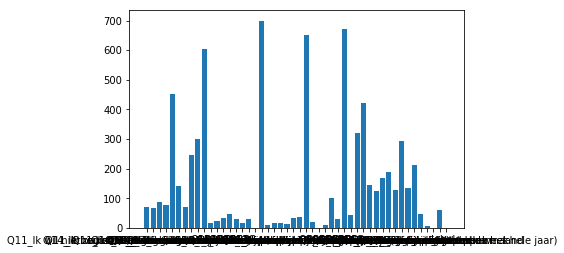

In [185]:
label0 = data.loc[data['labels'] == 0].astype(float)

sums0 = label0.sum()
plt.bar(label0.columns, sums0)


<Container object of 47 artists>

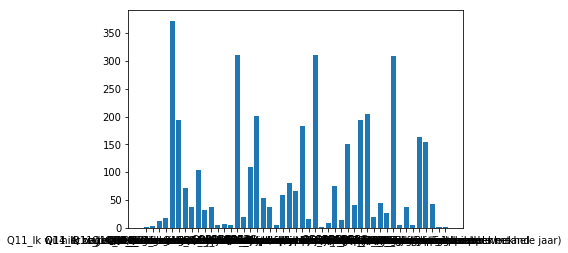

In [186]:
label1 = data.loc[data['labels'] == 1].astype(float)

sums1 = label1.sum()
plt.bar(label1.columns[:-1], sums1[:-1])

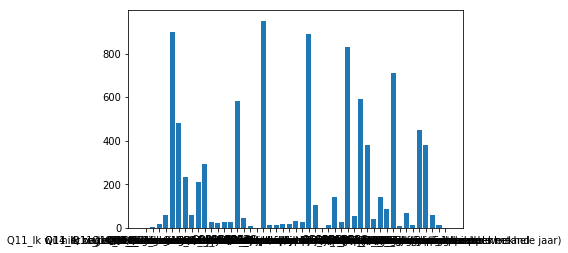

In [187]:
label2 = data.loc[data['labels'] == 2].astype(float)

sums2 = label2.sum()
plt.bar(label2.columns[:-1], sums2[:-1])

plt.show()

In [188]:
indices = []
for i in range(len(sums0)):
    if sums0[i] > 200:
        indices.append(i)



for i in range(len(sums1)):
    if sums1[i] > 200:
        if i not in indices:
            indices.append(i)
            
for i in range(len(sums2)):
    if sums2[i] > 200:
        if i not in indices:
            indices.append(i)

indices.sort()
indices = indices[:-1]
y0 = sums0[label0.columns[indices]]
y1 = sums1[label1.columns[indices]]
y2 = sums2[label2.columns[indices]]
#         print(label0.index.values)
#         print(sums1index)
# print(indices)
# ax.bar(x, z,width=0.2,color='g',align='center')
len(indices)


18

Index(['Q13A', 'Q13F', 'Q16A', 'Q16F',
       'Q8_Geen aparte trainingsperiode (ik train gedurende het hele jaar)',
       'Q9_1 keer per week', 'Q9_2 keer per week', 'Q9_3 keer per week',
       'Q10_Langer dan een jaar',
       'Q11_Ik wil niet vaker en/of meer kilometers hardlopen dan ik nu doe',
       'Q11_Ik zou meer kilometers willen hardlopen',
       'Q11_Ik zou vaker willen hardlopen',
       'Q11_Ik zou zowel vaker als meer kilometers willen hardlopen',
       'Q14_Ik begin meestal met hardlopen bij mijn hardloopvereniging.',
       'Q14_Ik begin meestal met hardlopen vanuit mijn huis.',
       'Q15_Niet, ik loop thuis de deur uit', 'Q47_Man', 'Q47_Vrouw'],
      dtype='object')


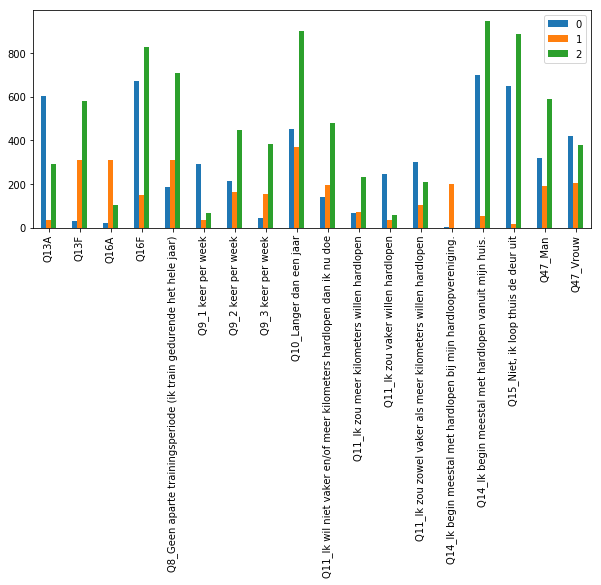

In [189]:
x = label0.columns[indices]
print(x)
y = np.array([y0,y1,y2]).T

df = pd.DataFrame(y,
                 index=x)
df.plot(kind='bar',figsize=(10,4))